##پرسش 1

#بخش 2

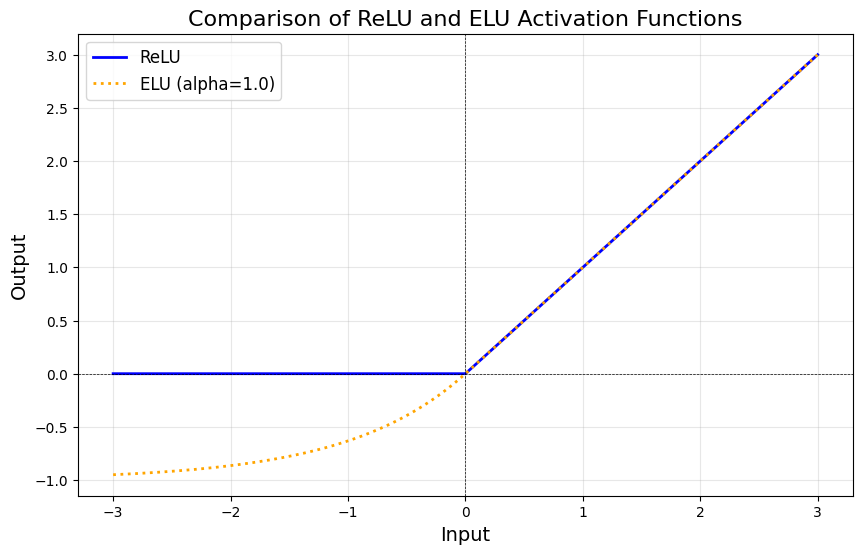

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the activation functions:
def relu(x):
    return np.maximum(0, x)

def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

x = np.linspace(-3, 3, 500)

y_relu = relu(x)
y_elu = elu(x, alpha=1.0)

plt.figure(figsize=(10, 6))

plt.plot(x, y_relu, label="ReLU", linewidth=2, color="blue")

plt.plot(x, y_elu, label="ELU (alpha=1.0)", linewidth=2, color="orange", linestyle=':')

plt.title("Comparison of ReLU and ELU Activation Functions", fontsize=16)
plt.xlabel("Input", fontsize=14)
plt.ylabel("Output", fontsize=14)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()

#بخش 3

مدل سازی نورن با یک کلاس

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts Neuron class
class McCulloch_Pitts_Neuron():
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)  # Define weights
        self.threshold = threshold        # Define threshold

    def model(self, x):
        if np.dot(self.weights, x) >= self.threshold:
            return 1
        else:
            return 0

تابع مدلِ طراحی شده

In [ ]:
# Define the MODEL function for the triangle
def MODEL(x, y):
    # Define neurons based on the triangle edges
    n1 = McCulloch_Pitts_Neuron([2, -1], 2)    # Line AB
    n2 = McCulloch_Pitts_Neuron([-2, -1], -6)  # Line AC
    n3 = McCulloch_Pitts_Neuron([0, 1], 0)     # Line BC
    n4 = McCulloch_Pitts_Neuron([1, 1, 1], 3)  # Combiner Neuron

    # Outputs of the neurons
    z1 = n1.model(np.array([x, y]))
    z2 = n2.model(np.array([x, y]))
    z3 = n3.model(np.array([x, y]))
    z4 = n4.model(np.array([z1, z2, z3]))

    return [z4]

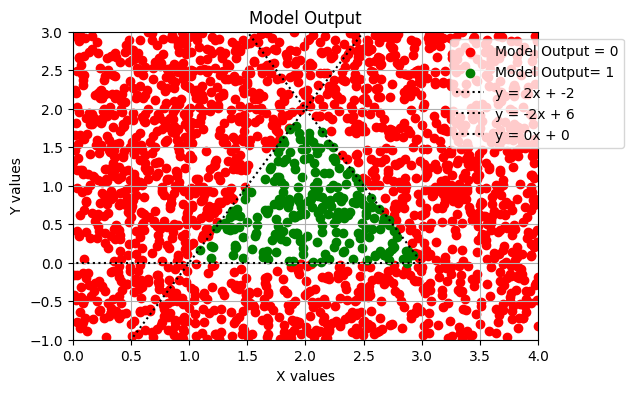

In [ ]:
# Generate random data points
np.random.seed(13)
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Initialize lists to store data points for different z4 values
red_points = []
green_points = []

# Evaluate data points using the MODEL function
for i in range(num_points):
    res = MODEL(x_values[i], y_values[i])
    if res == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

# Separate x and y values for red and green points
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='Model Output = 0')
plt.scatter(green_x, green_y, color='green', label='Model Output= 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Model Output')

# Plotting lines with legends
slopes = [2, -2, 0]
y_intercepts = [-2, 6, 0]
x_line = np.linspace(-1, 3, 1000)
for slope, intercept in zip(slopes, y_intercepts):
    y_line = slope * x_line + intercept
    plt.plot(x_line, y_line, color='black', linestyle=':', label=f'y = {slope}x + {intercept}')

plt.grid(True)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# Save plot as PNG
plt.savefig('c.png', bbox_inches='tight')

plt.show()
